<a href="https://colab.research.google.com/github/Nishitha-12/MajorProj2022/blob/main/Test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
data = pd.read_csv('IRSE_FIRE_2022_Track_Training_Data_preprocessed.csv')
data

,Comments,SurroundingCodeContext,Class
0,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
1,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful
2,/*done*/,"-10. multi_add_handle(m, curl);\n-9. for(;...",Not Useful
3,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
4,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful
...,...,...,...
8042,/*we need an additional DG0-node for a dim-dim...,-10. riaf.back() = true;\n-9. return riaf;...,Useful
8043,/*vertex/line/face domination\n(if fe_other is...,-1. return FiniteElementDomination::no_r...,Useful
8044,/*there are no requirements between continuous...,-2. if (codim > 0)\n-1. if (dynamic_cast...,Useful
8045,/*vertex/line/face domination\n(if fe_other is...,-1. return FiniteElementDomination::no_r...,Useful


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/MyDrive/IRSE

/content/drive/MyDrive/IRSE


In [6]:
#Date of Release: 1st June 2022. 8048 rows
data.head()

,Comments,SurroundingCodeContext,Class
0,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
1,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful
2,/*done*/,"-10. multi_add_handle(m, curl);\n-9. for(;...",Not Useful
3,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
4,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Comments                8047 non-null   object
 1   SurroundingCodeContext  8047 non-null   object
 2   Class                   8047 non-null   object
dtypes: object(3)
memory usage: 188.7+ KB


In [8]:
data.describe().transpose()

,count,unique,top,freq
Comments,8047,4992,/*********************************************...,144
SurroundingCodeContext,8047,5949,-5. namespace mu\n-4. {\n-3. \tstd::locale Par...,52
Class,8047,2,Useful,4337


# **DATA CLEANING**

In [9]:
#checking for any null values 
count = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Comments,0,0.0
SurroundingCodeContext,0,0.0
Class,0,0.0


Percentage for default

Useful        53.9
Not Useful    46.1
Name: Class, dtype: float64


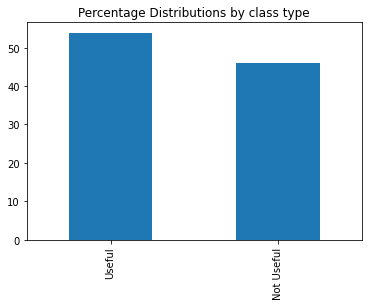

In [10]:
#Checking for the Distribution
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(data.Class.value_counts(normalize=True)*100,2))
round(data.Class.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by class type')
plt.show()

In [11]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [12]:
# Let's take a look at the updated text
data['cleaned_comments'] = pd.DataFrame(data.Comments.apply(cleaned1))
data.head(10)

,Comments,SurroundingCodeContext,Class,cleaned_comments
0,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful,test
1,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful,test
2,/*done*/,"-10. multi_add_handle(m, curl);\n-9. for(;...",Not Useful,done
3,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful,test
4,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful,test
5,/*argv1 = URL\n * argv2 = proxy\n * argv3 = no...,"-9. *\n-8. * You may opt to use, copy, modif...",Not Useful,url\n proxy\n nonzero means ascii tran...
6,/*enable ascii/text mode*/,"-10. if(!curl) {\n-9. fprintf(stderr, ""c...",Not Useful,enable asciitext mode
7,/*100 ms*/,"-10. multi_add_handle(mhandle, handle);\n-9....",Not Useful,ms
8,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful,on failure dont abort just issue a warning
9,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful,on failure dont abort just issue a warning


In [13]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [14]:
# Let's take a look at the updated text
data['cleaned_comments_new'] = pd.DataFrame(data['cleaned_comments'].apply(cleaned2))
data.head(10)

,Comments,SurroundingCodeContext,Class,cleaned_comments,cleaned_comments_new
0,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful,test,test
1,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful,test,test
2,/*done*/,"-10. multi_add_handle(m, curl);\n-9. for(;...",Not Useful,done,done
3,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful,test,test
4,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful,test,test
5,/*argv1 = URL\n * argv2 = proxy\n * argv3 = no...,"-9. *\n-8. * You may opt to use, copy, modif...",Not Useful,url\n proxy\n nonzero means ascii tran...,url proxy nonzero means ascii transfer
6,/*enable ascii/text mode*/,"-10. if(!curl) {\n-9. fprintf(stderr, ""c...",Not Useful,enable asciitext mode,enable asciitext mode
7,/*100 ms*/,"-10. multi_add_handle(mhandle, handle);\n-9....",Not Useful,ms,ms
8,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful,on failure dont abort just issue a warning,on failure dont abort just issue a warning
9,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful,on failure dont abort just issue a warning,on failure dont abort just issue a warning


# **MODEL TRAINING**

In [15]:
from sklearn.model_selection import train_test_split

Independent_var = data.cleaned_comments_new
#Independent_var2 = Reviewdata.cleaned_code_new
Dependent_var = data.Class

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 7242
IV_test  : 805
DV_train : 7242
DV_test  : 805


# **LOGISTIC REGRESSION**

In [20]:
#the tf idf vector -> frequency of the repeating words occuring most
# LR -> for classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix


tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


#creating a pipeline -> one by one step
from sklearn.pipeline import Pipeline

#pipeline first works in vect. then classify
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train) #->for test data



from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)


confusion_matrix(predictions, DV_test)
pd2 = pd.DataFrame(confusion_matrix(predictions, DV_test), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
print(pd2)

print("=== Confusion Matrix ===")
print(confusion_matrix(predictions, DV_test))
from sklearn.metrics import accuracy_score, precision_score, recall_score


print(classification_report(predictions, DV_test))

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))




                 Predicted Negative  Predicted Positive
Actual Negative                 259                  99
Actual Positive                  99                 348
=== Confusion Matrix ===
[[259  99]
 [ 99 348]]
              precision    recall  f1-score   support

  Not Useful       0.72      0.72      0.72       358
      Useful       0.78      0.78      0.78       447

    accuracy                           0.75       805
   macro avg       0.75      0.75      0.75       805
weighted avg       0.75      0.75      0.75       805

Accuracy :  0.7540372670807454
Precision :  0.7540372670807454
Recall :  0.7540372670807454


In [22]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(IV_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(IV_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


# **RANDOM FOREST CLASSIFIER**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
# random forest model creation

rfc = RandomForestClassifier()
model = Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])
model.fit(IV_train,DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)


array([[265,  92],
       [ 93, 355]])

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
X = data.cleaned_comments_new
y = data.Class
rfc_cv_score = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(predictions, DV_test))
print('\n')
print("=== Classification Report ===")
print(classification_report(DV_test, predictions))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

=== Confusion Matrix ===
[[265  92]
 [ 93 355]]


=== Classification Report ===
              precision    recall  f1-score   support

  Not Useful       0.74      0.74      0.74       358
      Useful       0.79      0.79      0.79       447

    accuracy                           0.77       805
   macro avg       0.77      0.77      0.77       805
weighted avg       0.77      0.77      0.77       805



=== All AUC Scores ===
[0.64574509 0.78914256 0.64318941 0.59953482 0.78330145 0.70828313
 0.93516092 0.84059374 0.85898545 0.8795279 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7683464473460645
Accuracy :  0.7701863354037267
Precision :  0.7702533664366497
Recall :  0.7701863354037267


# **SUPPORT VECTOR MACHINE**

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
model = Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC())])
model.fit(IV_train,DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(predictions, DV_test))
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

print(classification_report(predictions, DV_test))

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

=== Confusion Matrix ===
[[259  99]
 [ 99 348]]
              precision    recall  f1-score   support

  Not Useful       0.72      0.72      0.72       358
      Useful       0.78      0.78      0.78       447

    accuracy                           0.75       805
   macro avg       0.75      0.75      0.75       805
weighted avg       0.75      0.75      0.75       805

Accuracy :  0.7540372670807454
Precision :  0.7540372670807454
Recall :  0.7540372670807454


# **TRYING ON EXAMPLES**

In [21]:
#not useful class
example = ["/*Backwards compatibility.*/"]
result = model.predict(example)

print(result)

['Not Useful']


In [23]:
#useful class
example = ["/*Duplicated code because this is called from other parts of the library.*/"]
result = model.predict(example)

print(result)

['Useful']


In [24]:
#not useful class
example = ["/*Duplicated code*/"]
result = model.predict(example)

print(result)

['Not Useful']


In [25]:
#not useful class
example = ["/*recall*/"]
result = model.predict(example)

print(result)

['Not Useful']
